In [20]:
from dotenv import load_dotenv
load_dotenv()

import os

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

print(client_id)
print(client_secret)

620ecfa7814345648d9283b10e1cddb0
2dbcfce48e034791ba78f65ad1afd9ca


In [21]:

from spotipy.oauth2 import SpotifyClientCredentials
from spotipy import Spotify


In [22]:
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = Spotify(auth_manager=auth_manager)

In [23]:
artist_id = 'spotify:artist:450o9jw6AtiQlQkHCdH6Ru'
tracks = sp.artist_top_tracks(artist_id)
print(f"Las 10 canciones principales de {tracks['tracks'][0]['artists'][0]['name']} son:")
for track in tracks['tracks'][:10]:
    print(f"{track['name']} - {', '.join([artist['name'] for artist in track['artists']])}")



Las 10 canciones principales de Funkadelic son:
Can You Get To That - Funkadelic
Maggot Brain - Funkadelic
Hit It and Quit It - Funkadelic
Biological Speculation - Funkadelic
Ain't That Funkin' Kinda Hard on You? - We Ain't Neva Gonna Stop Remix - Funkadelic, Kendrick Lamar, Ice Cube
Super Stupid - Funkadelic
Knee Deep - Deep As A Mutha Funker Remix - Funkadelic, Digital Underground
Good Thoughts, Bad Thoughts - Funkadelic
One Nation Under a Groove - Funkadelic
You And Your Folks, Me And My Folks - Funkadelic


In [24]:
import pandas as pd
df = pd.json_normalize(tracks['tracks'])

df['duration_m'] = (df['duration_ms'] / 60000).round(2)



In [25]:
top3 = df.sort_values("popularity", ascending = False).head(3)
target = ["name", "album.name", "duration_m", "popularity"]
top3[target]

,name,album.name,duration_m,popularity
0,Can You Get To That,Maggot Brain,2.83,65
1,Maggot Brain,Maggot Brain,10.32,60
2,Hit It and Quit It,Maggot Brain,3.83,52


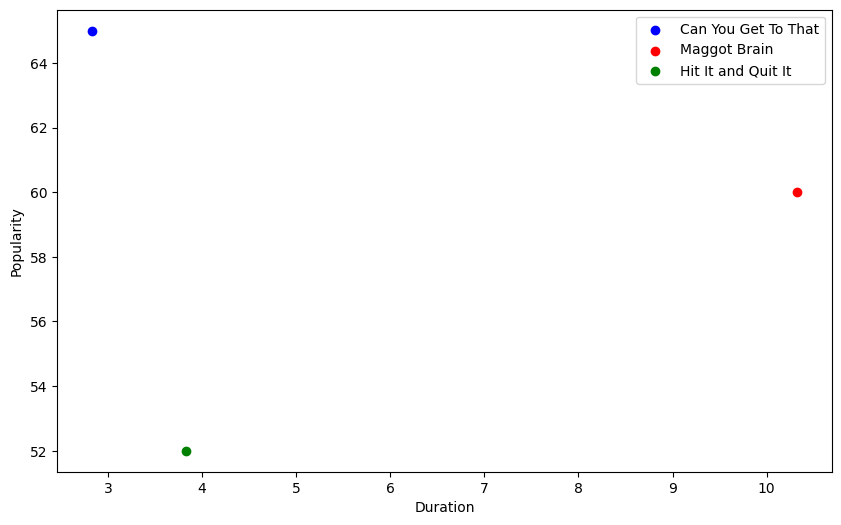

In [26]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame por canción
cancion1 = df[df['name'] == 'Can You Get To That']
cancion2 = df[df['name'] == 'Maggot Brain']
cancion3 = df[df['name'] == 'Hit It and Quit It']

# Crear el scatter plot para cada canción
plt.figure(figsize=(10, 6))

plt.scatter(cancion1['duration_m'], cancion1['popularity'], label='Can You Get To That', color='blue')
plt.scatter(cancion2['duration_m'], cancion2['popularity'], label='Maggot Brain', color='red')
plt.scatter(cancion3['duration_m'], cancion3['popularity'], label='Hit It and Quit It', color='green')

# Agregar etiquetas y leyenda
plt.xlabel('Duration')
plt.ylabel('Popularity')
plt.legend()

plt.show()


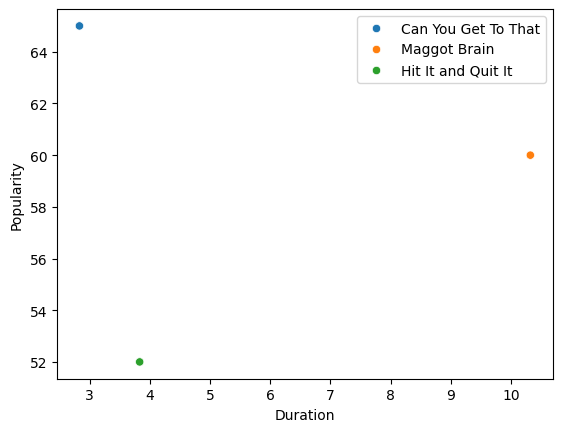

Bad pipe message: %s [b'0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7\r\nHost: localhost:35743\r\nUs', b'-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrom']
Bad pipe message: %s [b'119.0.0.0 Safari/537.36\r\nAccept-Encoding: gzip, deflate, br\r\nAccept-Language: es-ES,es;q=0.9,en;q=0.', b'de;q=0.7\r\nCache-Control: max-age=0\r\nCookie: _ga_2B75G58']
Bad pipe message: %s [b'7=GS1.1.1699228858.2.0.1699228858.0.0.0\r\nReferer: https://github.com/\r\nX-Request-ID']
Bad pipe message: %s [b'22c9699451431416fac878df15fc3577\r\nX-Real-IP: 10.240.3.217']
Bad pipe message: %s [b'X-Forwarded-']
Bad pipe message: %s [b'oto: https\r\nX-Forwarded-Host: upgraded-space-waddle-q7q79qwv644jh4qq4-35743.app']
Bad pipe message: %s [b'ithub.dev\r\nX-Forwarded-Port: 443\r\nX-Forwarded', b'cheme: https\r\nX-Original-URI: /\r\nX-Scheme: h', b'ps\r\nsec-fetch-site: cross-site\r\nsec-fetch-mode: navigate\r\nsec-fetch-dest:

In [27]:
import seaborn as sns

sns.scatterplot(data = top3, x = "duration_m", y = "popularity", hue = "name")

plt.xlabel('Duration')
plt.ylabel('Popularity')
plt.legend()

plt.show()


The most popular song is by far the shortest of the top 3. Nevertheless we should regard that the second song has an extremly large duration. Even so we should consider that the genre of this band is Progressive Rock.